# ME 7160 Project


### Solution to Van der Pol oscilator via FFT method:

#### Following equation to be solved.

**$\ddot{x} + (x^2 - 1)\dot{x} + x = cos(t)sin(4t)$**

         Current function value: 0.649414
         Iterations: 115
         Function evaluations: 7662
         Gradient evaluations: 153
Values of x after optimization:
[ 1.06932803  1.3526128   1.59115267  1.77305543  1.89604908  1.965038
  1.98797748  1.97317396  1.92840338  1.86081379  1.77672603  1.68107631
  1.57669354  1.46379607  1.34004695  1.20127351  1.04265182  0.85994118
  0.65037468  0.41302929  0.14882879 -0.13938179 -0.44611843 -0.76171083
 -1.07093587 -1.35417477 -1.5925269  -1.77415985 -1.89687244 -1.96562272
 -1.98838607 -1.97346321 -1.92861707 -1.86098352 -1.77687453 -1.68122101
 -1.57684908 -1.46397577 -1.34026384 -1.20154135 -1.04298668 -0.86036364
 -0.65091116 -0.41371308 -0.14969622  0.1382984   0.4448069   0.76020348]


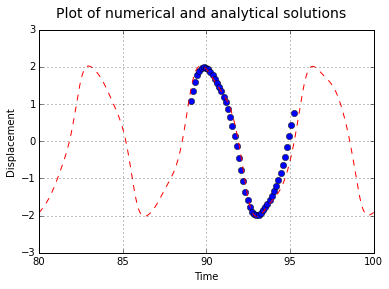

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 49 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

F = 1

#x0=1.5*np.ones(N-1)
#x0=1.48*np.cos(1*t)
x0=3.0*np.sin(4*t)*np.cos(1*t)

f = F*np.cos(1*t)*np.sin(4*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.00000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + (x**2 - 1)*xdot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution
from scipy.integrate import odeint
def deriv(x,t):
    return np.array([x[1], -(x[0]**2 - 1)*x[1] - x[0] + F*np.cos(1*t)*np.sin(4*t)])

time=np.linspace(0.0,100,2000)
xinit=np.array([-2, 0])
x=odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure()
plt.plot((28.35*np.pi)+t, sol.x, 'bo') #FFT solution plot
plt.plot(time, x[:,0] , 'r--') #analytical steady state solution to the above posed problem
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([80, 100, -3, 3])
plt.grid()
plt.show()

### Results from the optimization above can be used to approximate a fitted function that can be used as desired. Assume the following solution:

### $x(t) = A_o + A_1cos(\omega t + \beta) + A_2cos(2\omega t + 2\beta) + A_3cos(3\omega t + 3\beta) + A_4cos(4\omega t + 4\beta) + A_5cos(5\omega t + 5\beta) + A_6cos(6\omega t + 6\beta) + A_7cos(7\omega t + 7\beta) + A_8cos(8\omega t + 8\beta)$

#### Here coefficients $A_o$, $A_1$, $A_2$, $A_3$, $A_4$,$A_5$,$A_6$,$A_7$,$A_8$,$\omega$, $\beta$ are the unknowns and will be solved for using least square fitting

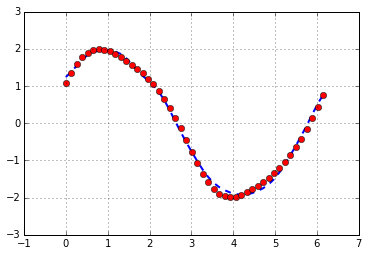

Coefficient values listed below
[  4.21417771e-02  -1.97804995e+00  -6.39984611e-02   4.14584453e-02
   5.75549205e-02  -2.23565584e-02  -1.52588452e-03   1.94801115e-02
  -1.86702733e-02   9.59025818e-01   2.24519230e+00]


In [16]:
#Define function to be called in the "leastsq" function
def errorFun(p, t):
    A0, A1, A2, A3, A4, A5, A6, A7, A8, omega, beta = p
    err = sol.x - (A0 + A1*np.cos(omega*t + beta) + A2*np.cos(2*omega*t + 2*beta)\
                   + A3*np.cos(3*omega*t + 3*beta) + A4*np.cos(4*omega*t + 4*beta)\
                   + A5*np.cos(5*omega*t + 5*beta) + A6*np.cos(6*omega*t + 6*beta)\
                   + A7*np.cos(7*omega*t + 7*beta) + A8*np.cos(8*omega*t + 8*beta))
    return err

#Initial guess for coefficients
p0 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#print(np.array(p0))

#Least square calculation
from scipy.optimize import leastsq
plsq = leastsq(errorFun, p0, args=(t))

#Function used for plotting purposes
def peval(t, p):
    return p[0] + p[1]*np.cos(p[9]*t + p[10]) + p[2]*np.cos(2*p[9]*t + 2*p[10])\
                + p[3]*np.cos(3*p[9]*t + 3*p[10]) + p[4]*np.cos(4*p[9]*t + 4*p[10])\
                + p[5]*np.cos(5*p[9]*t + 5*p[10]) + p[6]*np.cos(6*p[9]*t + 6*p[10])\
                + p[7]*np.cos(7*p[9]*t + 7*p[10]) + p[8]*np.cos(8*p[9]*t + 8*p[10])

#Plot numerical and least square results
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(t, peval(t, plsq[0]), 'b--', linewidth = 2)
plt.plot(t, sol.x, 'ro')
plt.axis([-1, 7, -3, 3])
plt.grid()
plt.show()

coeff = plsq[0]

#Plot calculated results the coefficients
print('Coefficient values listed below')
print(plsq[0])

### Fitted equation can be seen below:

In [17]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

time=sp.Symbol('t', real = True)

A0=sp.nsimplify(round(coeff[0], 2))
A1=sp.nsimplify(round(coeff[1], 2))
A2=sp.nsimplify(round(coeff[2], 2))
A3=sp.nsimplify(round(coeff[3], 2))
A4=sp.nsimplify(round(coeff[4], 2))
A5=sp.nsimplify(round(coeff[5], 2))
A6=sp.nsimplify(round(coeff[6], 2))
A7=sp.nsimplify(round(coeff[7], 2))
A8=sp.nsimplify(round(coeff[8], 2))
omega=sp.nsimplify(round(coeff[9], 2))
beta=sp.nsimplify(round(coeff[10], 2))

ans = A0 + A1*sp.cos(omega*time + beta) + A2*sp.cos(2*omega*time + 2*beta)\
         + A3*sp.cos(3*omega*time + 3*beta) + A4*sp.cos(4*omega*time + 4*beta)\
         + A5*sp.cos(5*omega*time + 5*beta) + A6*sp.cos(6*omega*time + 6*beta)\
         + A7*sp.cos(7*omega*time + 7*beta) + A8*sp.cos(8*omega*time + 8*beta)
ans

        ⎛24⋅t   9⎞        ⎛48⋅t   9⎞      ⎛72⋅t   27⎞        ⎛96⋅t    ⎞      ⎛
  99⋅cos⎜──── + ─⎟   3⋅cos⎜──── + ─⎟   cos⎜──── + ──⎟   3⋅cos⎜──── + 9⎟   cos⎜
        ⎝ 25    4⎠        ⎝ 25    2⎠      ⎝ 25    4 ⎠        ⎝ 25     ⎠      ⎝
- ──────────────── - ─────────────── + ────────────── + ─────────────── - ────
         50                 50               25                50             

24⋅t   45⎞      ⎛168⋅t   63⎞      ⎛192⋅t     ⎞     
──── + ──⎟   cos⎜───── + ──⎟   cos⎜───── + 18⎟     
 5     4 ⎠      ⎝  25    4 ⎠      ⎝  25      ⎠   1 
────────── + ─────────────── - ─────────────── + ──
  50                50                50         25